In [1]:
import numpy.random as rand
import matplotlib.pyplot as plot
import numpy as numpy
from scipy.optimize import linprog
%matplotlib inline

Реальные параметры выберем следующими:
$a_2=1, a_1 = 2, a_0 = 3$

In [2]:
real_a = [1, 2, 3]

def get_y(a, t):
    return numpy.array(numpy.sin(t) * a[0] + t * a[1] + a[2])

m = 100
t = numpy.array([i * 10 / m for i in range(m)])

In [3]:
test_sigma = 1
y_exp = numpy.array(get_y(real_a, t)) + numpy.array(numpy.random.normal(0, test_sigma, m))

Обозначим $r_k=y^{exp}_k-a_2\sin(t_k)-a_1t_k-a_0$ - невязка, где $y^{exp}_k$ - измеренные значеначения $y$.

Рассмотрим функцию $\phi=\sum\limits_{k=0}^{n}r_k^2=\sum\limits_{k=0}^{n}(y^{exp}_k-a_2\sin(t_k)-a_1t_k-a_0)^2$. Минимизация этой фукнции в зависимости от $a_i$ эквивалентна приравниванию к нулю ее градиента, т.е. ее частных производных по $a_i$. Получим систему уравнений, из которой можно найти $a_i$

$$
\begin{equation}
\begin{cases}
    \frac{\partial\phi}{\partial a_2}=-2\sum\limits_{k=0}^{n}\sin(t_k)(y^{exp}_k-a_2\sin(t_k)-a_1t_k-a_0)=0\\
    \frac{\partial\phi}{\partial a_1}=-2\sum\limits_{k=0}^{n}t_k(y^{exp}_k-a_2\sin(t_k)-a_1t_k-a_0)=0\\
    \frac{\partial\phi}{\partial a_0}=-2\sum\limits_{k=0}^{n}(y^{exp}_k-a_2\sin(t_k)-a_1t_k-a_0)=0
\end{cases}
\end{equation}
$$

Эта система эквивалентана системе $Ax=b$, где

$$
A=\begin{pmatrix}
\sum\limits_{k=0}^{n}(\sin(t_k))^2 & \sum\limits_{k=0}^{n}t_k\sin(t_k) & \sum\limits_{k=0}^{n}\sin(t_k)\\
\sum\limits_{k=0}^{n}t_k\sin(t_k) & \sum\limits_{k=0}^{n}t_k^2 & \sum\limits_{k=0}^{n}t_k\\
\sum\limits_{k=0}^{n}\sin(t_k) & \sum\limits_{k=0}^{n}t_k & n+1
\end{pmatrix}
$$

$$
b=\begin{pmatrix}
\sum\limits_{k=0}^{n}y^{exp}_k\sin(t_k)\\
\sum\limits_{k=0}^{n}y^{exp}_kt_k\\
\sum\limits_{k=0}^{n}y^{exp}_k
\end{pmatrix}
$$

$$
x=\begin{pmatrix}
a_2\\
a_1\\
a_0
\end{pmatrix}
$$

In [4]:
def get_a_1(y, t):
    A = numpy.matrix([
            [numpy.sum(numpy.sin(t) ** 2), numpy.sum(numpy.sin(t) * t), numpy.sum(numpy.sin(t))],
            [numpy.sum(numpy.sin(t) * t), numpy.sum(t ** 2), numpy.sum(t)],
            [numpy.sum(numpy.sin(t)), numpy.sum(t), len(t)]
        ])

    b = numpy.matrix([
            [numpy.sum(numpy.sin(t) * y)],
            [numpy.sum(t * y)],
            [numpy.sum(y)]
        ])
    
    return numpy.array((A.I * b).T)[0]

In [5]:
evaluation_1 = get_a_1(y_exp, t)
print(evaluation_1)

[ 1.2279853   2.00667356  3.02054371]


Теперь рассмотрим функцию $\phi=\sum\limits_{k=0}^{n}|r_k|=\sum\limits_{k=0}^{n}|y^{exp}_k-a_2\sin(t_k)-a_1t_k-a_0|$. Для минимизации такой фукнции сформулируем соответствующую задачу линейного программрования и соответсвующие ей матрицу A и вектора x, c и b.

Введем переменные $\Delta_k$, сумму которых будем минимизировать. Вектор переменных $x$ примет вид:

$$
x=\begin{pmatrix}
a_2\\
a_1\\
a_0\\
\Delta_0\\
\cdots\\
\Delta_n
\end{pmatrix}
$$

А вектор $c$:

$$
c=\begin{pmatrix}
0\\
0\\
0\\
1\\
\cdots\\
1
\end{pmatrix}
$$

На $\Delta_k$ наложим следующие условия:

$$
\begin{equation}
\begin{cases}
    \Delta_k\ge y^{exp}_k-a_2\sin(t_k)-a_1t_k-a_0\\
    \Delta_k\ge -y^{exp}_k+a_2\sin(t_k)+a_1t_k+a_0
\end{cases}
\end{equation}
$$

Что можно переписать как 

$$
\begin{equation}
\begin{cases}
    a_2\sin(t_k)+a_1t_k+a_0-\Delta_k \le y^{exp}_k\\
    -a_2\sin(t_k)-a_1t_k-a_0-\Delta_k \le -y^{exp}_k\\
\end{cases}
\end{equation}
$$

Откуда получим матрицу $A$ и вектор $b$:

$$
A=\begin{pmatrix}
\sin{t_0} & t_0 & 1 & -1 & 0 & 0 & \cdots & 0\\
\sin{t_1} & t_1 & 1 & 0 & -1 & 0 & \cdots & 0\\
\cdots\\
\sin{t_n} & t_n & 1 & 0 & 0 & \cdots & 0 & -1\\
-\sin{t_0} & -t_0 & -1 & -1 & 0 & 0 & \cdots & 0\\
-\sin{t_1} & -t_1 & -1 & 0 & -1 & 0 & \cdots & 0\\
\cdots\\
-\sin{t_n} & -t_n & -1 & 0 & 0 & \cdots & 0 & -1
\end{pmatrix}
$$

$$
b=\begin{pmatrix}
y_0\\
\cdots\\
y_n\\
-y_0\\
\cdots\\
-y_n
\end{pmatrix}
$$



In [6]:
def string_1(i):
    result = [numpy.sin(t[i]), t[i], 1]
    result.extend([(-1 if i == j else 0) for j in range(len(t))])
    return result

def string_2(i):
    result = [-numpy.sin(t[i]), -t[i], -1]
    result.extend([(-1 if i == j else 0) for j in range(len(t))])
    return result

def get_a_2(y, t):
    A = [string_1(i) for i in range(len(t))]
    A.extend([string_2(i) for i in range(len(t))])

    b = numpy.concatenate([y, -y])
    c = [0, 0, 0]
    c.extend([1 for i in range(len(t))])
    return linprog(c, A_ub=A, b_ub=b)['x'][:3]

In [7]:
evaluation_2 = get_a_2(y_exp, t)
print(evaluation_2)

[ 1.22192626  2.0213604   2.95137084]


Рассмотриваем функцию $\phi=\max_\limits{k}|r_k|=\max_\limits{k}|y^{exp}_k-a_2\sin(t_k)-a_1t_k-a_0|$. Свнова сформулируем задачу линейного программирования, минимизирующую эту фукнцию и соответвтующие матрицы.

Введем переменную $\Delta$, которую будем минимизировать. Вектор переменных $x$ примет вид:

$$
x=\begin{pmatrix}
a_2\\
a_1\\
a_0\\
\Delta
\end{pmatrix}
$$

А вектор $c$:

$$
c=\begin{pmatrix}
0\\
0\\
0\\
1
\end{pmatrix}
$$

На $\Delta$ наложим следующие условия:

$$
\begin{equation}
\begin{cases}
    \Delta\ge y^{exp}_k-a_2\sin(t_k)-a_1t_k-a_0\\
    \Delta\ge -y^{exp}_k+a_2\sin(t_k)+a_1t_k+a_0
\end{cases}
\end{equation}
$$

Что можно переписать как 

$$
\begin{equation}
\begin{cases}
    a_2\sin(t_k)+a_1t_k+a_0-\Delta \le y^{exp}_k\\
    -a_2\sin(t_k)-a_1t_k-a_0-\Delta \le -y^{exp}_k\\
\end{cases}
\end{equation}
$$

Отсюда ясно, что брать за $A$ и $b$. В результате:

$$
A=\begin{pmatrix}
\sin{t_0} & t_0 & 1 & -1\\
\sin{t_1} & t_1 & 1 & -1\\
\cdots\\
\sin{t_n} & t_n & 1 & -1\\
-\sin{t_0} & -t_0 & -1 & -1\\
-\sin{t_1} & -t_1 & -1 & -1\\
\cdots\\
-\sin{t_n} & -t_n & -1 & -1\\
\end{pmatrix}
$$

$$
b=\begin{pmatrix}
y_0\\
\cdots\\
y_n\\
-y_0\\
\cdots\\
-y_n
\end{pmatrix}
$$

In [8]:
def get_a_3(y, t):
    c =  [0, 0, 0, 1]
    b = numpy.concatenate([y, -y])
    A = [[numpy.sin(t_i), t_i, 1, -1] for t_i in t]
    A.extend([[-numpy.sin(t_i), -t_i, -1, -1] for t_i in t])
    
    return linprog(c, A_ub=A, b_ub=b)['x'][:3]

In [9]:
evaluation_3 = get_a_3(y_exp, t)
print(evaluation_3)

[ 0.57512765  1.850364    4.11197476]


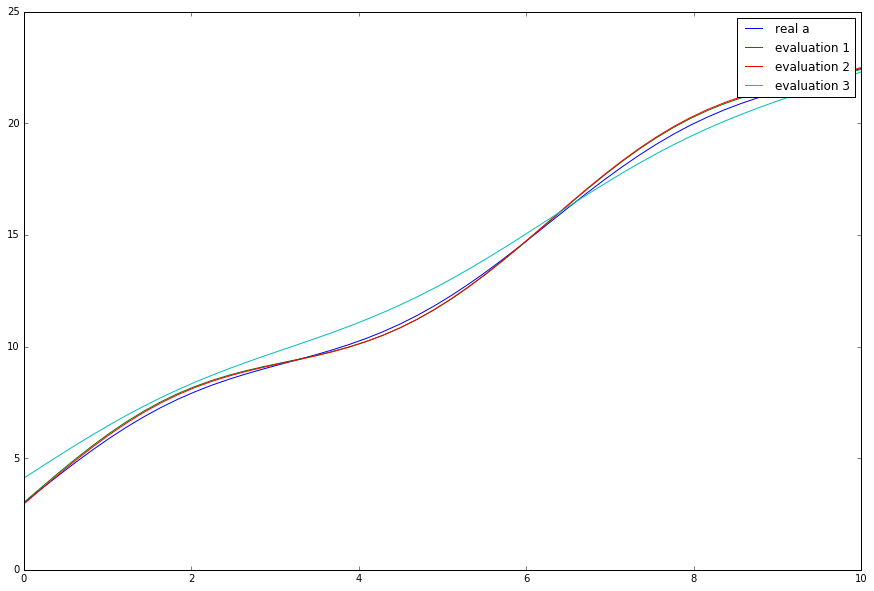

In [10]:
continues_t = numpy.linspace(0, 10)

plot.figure(figsize=(15, 10))

plot.plot(continues_t, get_y(real_a, continues_t), label="real a")
plot.plot(continues_t, get_y(evaluation_1, continues_t), label="evaluation 1")
plot.plot(continues_t, get_y(evaluation_2, continues_t), label="evaluation 2")
plot.plot(continues_t, get_y(evaluation_3, continues_t), label="evaluation 3")

axis = plot.gca()
axis.legend()

Выясним, как меняется отклюнение от реальной зависимости при уменьшении разброва шума. Для этого рассмотрим $\sigma\in\{2, 1, 0.5, 0.25, 0.01\}$ и почситем норму разности точной зависимости и зависимости с оцененными параметрами для каждой из этих $\sigma$.

Для первого метода:

In [11]:
sigmas = [2, 1, 0.5, 0.25, 0.01]

for sigma in sigmas:
    y = numpy.array(get_y(real_a, t)) + numpy.array(numpy.random.normal(0, sigma, m))
    evaluation = get_a_1(y, t)
    print(numpy.linalg.norm(get_y(real_a, continues_t) - get_y(evaluation, continues_t), numpy.inf))

0.667763814168
0.431310041183
0.121812521933
0.081564743505
0.000966262656564


Для второго метода:

In [12]:
for sigma in sigmas:
    y = numpy.array(get_y(real_a, t)) + numpy.array(numpy.random.normal(0, sigma, m))
    evaluation = get_a_2(y, t)
    print(numpy.linalg.norm(get_y(real_a, continues_t) - get_y(evaluation, continues_t), numpy.inf))

1.21659169192
0.210063257986
0.0892491480101
0.106529094282
0.00205156266225


Для тертьего:

In [13]:
for sigma in sigmas:
    y = numpy.array(get_y(real_a, t)) + numpy.array(numpy.random.normal(0, sigma, m))
    evaluation = get_a_3(y, t)
    print(numpy.linalg.norm(get_y(real_a, continues_t) - get_y(evaluation, continues_t), numpy.inf))

1.66994390762
0.576626854965
0.371983235899
0.197161832312
0.00533414497013


Вне зависимости от метода, уменьшая разброс шумов получаем улучшение точности оценивания.

Теперь добавим в значения $y$ выбросы, отняв 50 от первого значения в массиве и прибавив 50 к последнему. Проверим, какой из методов окажется наиболее устойчив к такому изменению, снова посчитав норму между точной зависимостью и оцененной зависимостью.

3.20793384753
0.413661659342
45.4938832983


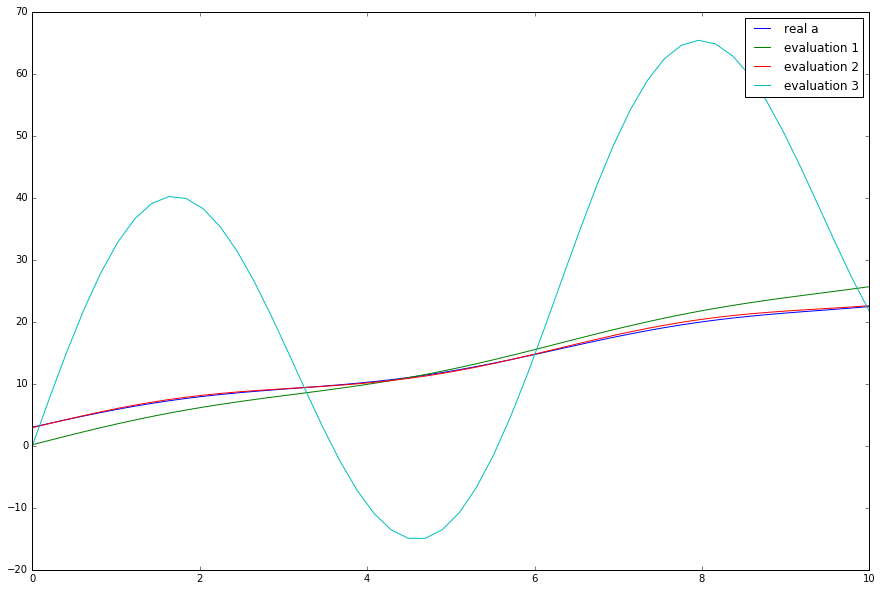

In [14]:
y_exp_modificated = numpy.array([y_exp[i] - 50 if i == 0 else y_exp[i] + 50 if i == len(y_exp) - 1 else y_exp[i] for i in range(len(y_exp))])
modificated_evaluation_1 = get_a_1(y_exp_modificated, t)
modificated_evaluation_2 = get_a_2(y_exp_modificated, t)
modificated_evaluation_3 = get_a_3(y_exp_modificated, t)
print(numpy.linalg.norm(get_y(real_a, continues_t) - get_y(modificated_evaluation_1, continues_t), numpy.inf))
print(numpy.linalg.norm(get_y(real_a, continues_t) - get_y(modificated_evaluation_2, continues_t), numpy.inf))
print(numpy.linalg.norm(get_y(real_a, continues_t) - get_y(modificated_evaluation_3, continues_t), numpy.inf))

plot.figure(figsize=(15, 10))
plot.plot(continues_t, get_y(real_a, continues_t), label="real a")
plot.plot(continues_t, get_y(modificated_evaluation_1, continues_t), label="evaluation 1")
plot.plot(continues_t, get_y(modificated_evaluation_2, continues_t), label="evaluation 2")
plot.plot(continues_t, get_y(modificated_evaluation_3, continues_t), label="evaluation 3")
axis = plot.gca()
axis.legend()

Наиболее устойчивым оказался второй метод. Хуже всего проявил третий метод, который оказался совершенно неутойчивым.